# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow-macos tensorflow-metal opencv-python matplotlib

INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 7.7 MB/s  0:00:29m0:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 11.0 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 13.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 13.6 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 11.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.3.1
anyio                        4.10.0
appnope                      0.1.4
argon2-cffi                  25.1.0
argon2-cffi-bindings         25.1.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.4
bleach                       6.2.0
certifi                      2025.8.3
cffi                         1.17.1
charset-normalizer           3.4.2
comm                         0.2.3
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.15
decorator                    5.2.1
defusedxml                   0.7.1
exceptiongroup               1.3.0
executing                    2.2.0
fastjsonschema               2.21.1
flatbuffers                  25

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2025-08-06 15:33:27.441265: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-08-06 15:33:27.441295: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-08-06 15:33:27.441301: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-08-06 15:33:27.441327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-06 15:33:27.441343: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

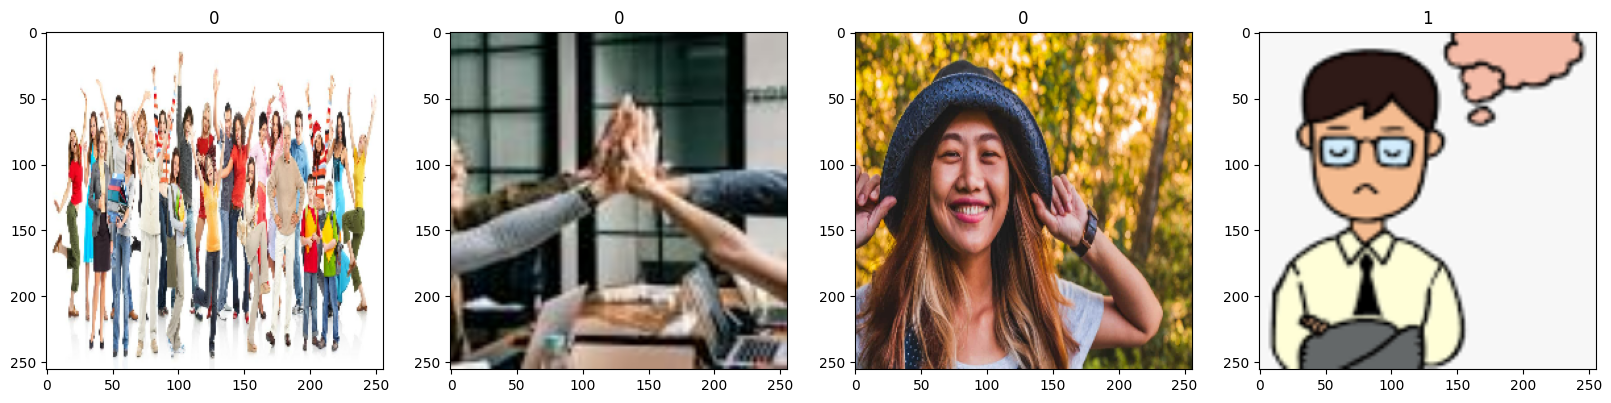

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.11670628, 0.16198635, 0.09839872],
          [0.09814106, 0.18752526, 0.08245024],
          [0.14874758, 0.2760876 , 0.13372265],
          ...,
          [0.25791338, 0.379482  , 0.21650079],
          [0.2577206 , 0.39497548, 0.23811275],
          [0.25015318, 0.38740808, 0.23054534]],
 
         [[0.14781483, 0.20228787, 0.1360348 ],
          [0.14431596, 0.23755792, 0.137649  ],
          [0.15991487, 0.2911802 , 0.1628138 ],
          ...,
          [0.25301406, 0.37458268, 0.21379837],
          [0.23575367, 0.36170343, 0.21614583],
          [0.22818628, 0.35413602, 0.20857844]],
 
         [[0.17351146, 0.23310092, 0.16514748],
          [0.11639464, 0.19838735, 0.11935484],
          [0.14397977, 0.24590993, 0.15026042],
          ...,
          [0.2435049 , 0.3624398 , 0.20955667],
          [0.21096814, 0.3317402 , 0.19371936],
          [0.21173671, 0.33250877, 0.19448793]],
 
         ...,
 
         [[0.3257865 , 0.48432532, 0.15039194],
          [0.35249

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [31]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
model = Sequential()

In [23]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2025-08-06 15:36:16.038495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.4955 - loss: 1.2362 - val_accuracy: 0.7031 - val_loss: 0.6724
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step - accuracy: 0.5893 - loss: 0.6789 - val_accuracy: 0.7969 - val_loss: 0.6592
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.6741 - loss: 0.6819 - val_accuracy: 0.5781 - val_loss: 0.7281
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.5759 - loss: 0.6965 - val_accuracy: 0.6406 - val_loss: 0.6350
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.6429 - loss: 0.6318 - val_accuracy: 0.7188 - val_loss: 0.5918
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.7232 - loss: 0.5907 - val_accuracy: 0.7969 - val_loss: 0.5673
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.7054 - loss: 0.5607 - val_accuracy: 0.7969 - val_loss: 0.5144
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.7857 - loss: 0.4655 - val_accuracy: 0.7969 - val_loss: 0.4119
Epo

# 8. Plot Performance

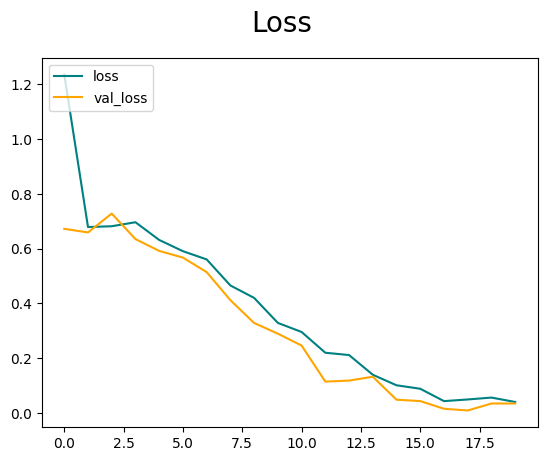

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

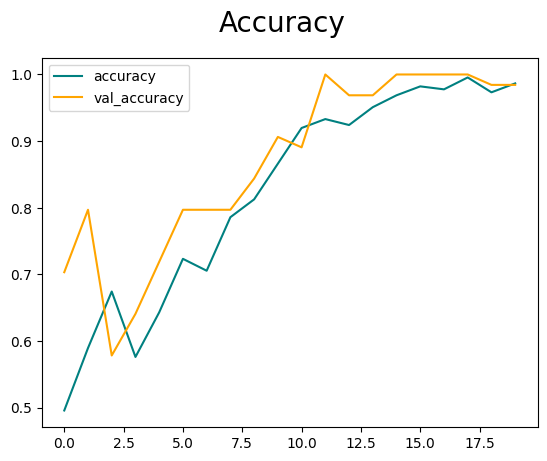

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for X, y in test:
    yhat = model.predict(X, verbose=0)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


2025-08-06 15:36:59.998622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [39]:
import cv2

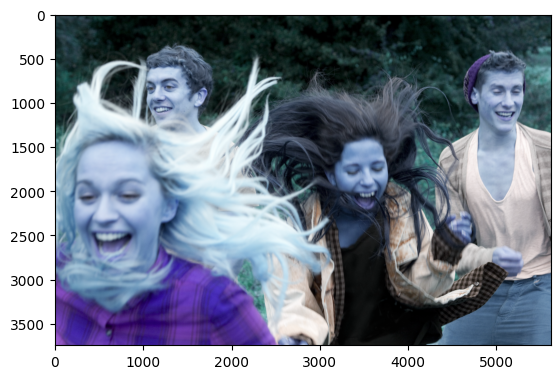

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

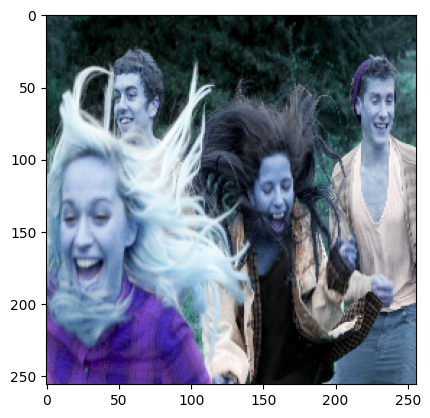

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [43]:
yhat

array([[0.04081067]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models', 'imageclassifier.keras'))

In [47]:
from keras.models import load_model

new_model = load_model('/Users/mrinaldhar/ImageClassification/models/imageclassifier.keras')

In [50]:
pred = (new_model.predict(np.expand_dims(resize/255, 0)) > 0.5).astype("int32")
print(pred)  # 0 or 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[0]]


In [49]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.04081067]], dtype=float32)

In [51]:
prob = new_model.predict(np.expand_dims(resize/255, 0))[0][0]

if prob > 0.5:
    print(f"Prediction: Class 1 with {prob*100:.2f}% confidence.")
else:
    print(f"Prediction: Class 0 with {(1-prob)*100:.2f}% confidence.")

print("\n--- Result Summary ---")
print("The model successfully processed the image and provided a prediction based on learned patterns.")
print("Probability scores indicate the confidence of the model in its classification decision.")
print("Further testing with a larger dataset is recommended to validate overall model performance.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: Class 0 with 95.92% confidence.

--- Result Summary ---
The model successfully processed the image and provided a prediction based on learned patterns.
Probability scores indicate the confidence of the model in its classification decision.
Further testing with a larger dataset is recommended to validate overall model performance.
